**In-class activity N°2**

Group 2:

* Andrea Franco
* Andres Salguero
* Harpreet Kaur

# Libraries

In [57]:
import pandas as pd
import numpy as np
from sklearn import linear_model

from sklearn.metrics import mean_absolute_error,mean_squared_error 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Stock market data

The business would like to predict any of the columns of data from July 30, 2021 based on the data for July 1 to July 29, 2023. So this is a predictive analysis activity.

In our case, we will predict the **volume** based on previous data.

Feature descriptions:

* symbol: the underlying stock

* date: the dataset date

* adjusted close: the closing price of the underlying stock after extended trading session

* stock price: the closing price of the underlying stock

* option symbol: string combining other fields identifying the option

* expiration: date that the option expires

* strike: the price that the option gives you the right to trade the underlying stock

* call/put: whether the option is a Call (right to buy underlying stock) or a Put (right to sell underlying stock)

* ask/bid/meanprice: market prices of the option (last offer to sell, last offer to buy, and the average of the two prices)

* iv: how fearful the market is of a market crash or severe decline in prices

* volume: number of contracts traded today

* open interest: number of contracts currently held

* greeks (delta, gamma, vega, theta, rho): group of five metrics used to analyze the risk and potential return of options contracts.



# Original activity 2

## IV) Data Extraction

As the dataset has already been characterized, identified and acquired, we start the data lifecycle from the Data extraction.

In [58]:
df = pd.read_csv("https://raw.githubusercontent.com/afscomercial/big-data-fundamental/main/class-activities/data_activity2.csv")
df

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00215000,07/30/2021,215.0,C,A,224.56,...,-1.000000,0,0,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
1,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00215000,07/30/2021,215.0,P,A,0.01,...,-1.000000,0,1401,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
2,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00220000,07/30/2021,220.0,C,A,219.56,...,-1.000000,0,1,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
3,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00220000,07/30/2021,220.0,P,A,0.01,...,-1.000000,50,328,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
4,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00225000,07/30/2021,225.0,C,A,214.56,...,-1.000000,0,0,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221041,SPY,NYSEArca,07/01/2021,430.43,SPY 231215P00630000,12/15/2023,630.0,P,A,206.50,...,0.148305,0,1,430.26,*,-0.924500,0.750370,0.001112,-0.011128,-14.857175
221042,SPY,NYSEArca,07/01/2021,430.43,SPY 231215C00635000,12/15/2023,635.0,C,A,2.20,...,0.148310,0,146,430.26,NaN,0.051628,0.710649,0.001053,-0.005507,0.496773
221043,SPY,NYSEArca,07/01/2021,430.43,SPY 231215P00635000,12/15/2023,635.0,P,A,211.50,...,0.148310,0,0,430.26,*,-0.928176,0.710649,0.001053,-0.010792,-15.014119
221044,SPY,NYSEArca,07/01/2021,430.43,SPY 231215C00640000,12/15/2023,640.0,C,A,2.73,...,0.148310,5,1,430.26,*,0.048170,0.672488,0.000997,-0.005217,0.463973



## Step V) Data Validation and Cleansing
 For this we will check for null functions in our dataset using isnull function() and also check for unique values using unique function.

In [59]:
df.isnull().sum()

symbol                     0
exchange                   0
date                       0
adjusted close             0
option symbol              0
expiration                 0
strike                     0
call/put                   0
style                      0
ask                        0
bid                        0
mean price                 0
iv                         0
volume                     0
open interest              0
stock price for iv         0
*                     192007
delta                      0
vega                       0
gamma                      0
theta                      0
rho                        0
dtype: int64

### Checking for unique values:

In [60]:
df.nunique()

symbol                     1
exchange                   1
date                      21
adjusted close            21
option symbol          13960
expiration                48
strike                   312
call/put                   2
style                      1
ask                    22926
bid                    22611
mean price             36172
iv                    146910
volume                  6205
open interest          14825
stock price for iv        21
*                          1
delta                 182814
vega                  179397
gamma                  28374
theta                  91796
rho                   183742
dtype: int64

### Dropping all the columns with only one unique value:


From the previous analysis, we decided to drop the columns with one unique value because it won't give any insight to the model as it doesn't have any variety of data at all that help us to the determine the correct output. The columns that present this behavior are "symbol", "exchange", "style" and "*"

In [61]:
df = df.loc[:, df.nunique() > 1]

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221046 entries, 0 to 221045
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                221046 non-null  object 
 1   adjusted close      221046 non-null  float64
 2   option symbol       221046 non-null  object 
 3   expiration          221046 non-null  object 
 4   strike              221046 non-null  float64
 5   call/put            221046 non-null  object 
 6   ask                 221046 non-null  float64
 7   bid                 221046 non-null  float64
 8   mean price          221046 non-null  float64
 9   iv                  221046 non-null  float64
 10  volume              221046 non-null  int64  
 11  open interest       221046 non-null  int64  
 12  stock price for iv  221046 non-null  float64
 13  delta               221046 non-null  float64
 14  vega                221046 non-null  float64
 15  gamma               221046 non-nul

### Dropping columns that do not give value to the target

In [63]:
data = df.copy()

In [64]:
data.drop(['expiration', 'option symbol'],axis=1, inplace=True)

### Converting Qualitative feature into Quantitative Feature:
Here ,we are converting call/put qualitative feature into Quantitative feature

In [65]:
le = LabelEncoder()

In [66]:
data['call/put'] = le.fit_transform(data['call/put'])
label_mapping1 = dict(enumerate(le.classes_))
print(label_mapping1)

{0: 'C', 1: 'P'}


## Step VI) Data aggregation and representation:
In this step we have to integrate multiple datasets into one single dataset. As the dataset we are dealing with does not have multiple datasets, we don't need to do this step and data is in the format of csv file.

## VII) Data Analysis

### 1. Target variable exploration

From the exploration of our target variable "volume" we can see that most of the data has a value lesser than 100'000.

Text(0, 0.5, 'Frequency')

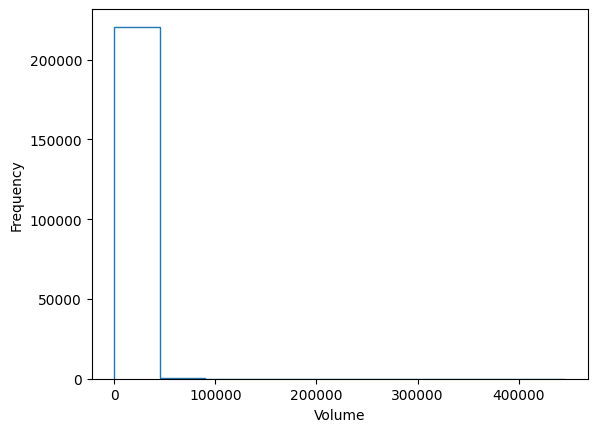

In [67]:
counts, bins = np.histogram(df['volume'])
plt.stairs(counts, bins)
plt.xlabel('Volume')
plt.ylabel('Frequency')

In [68]:
data['volume'].describe()

count    221046.000000
mean        405.715661
std        5100.355521
min           0.000000
25%           0.000000
50%           0.000000
75%          19.000000
max      446333.000000
Name: volume, dtype: float64

In fact, more than 75% of the data has a value less or equal than 19

<Axes: >

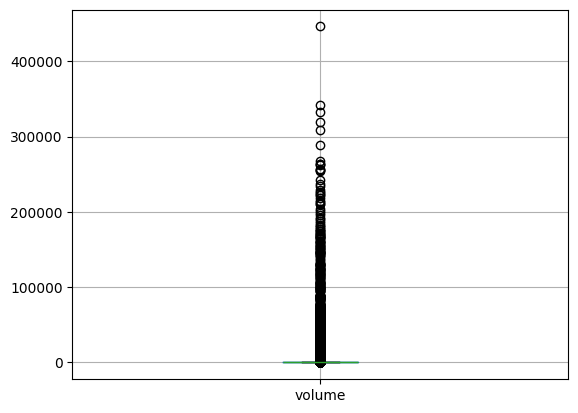

In [69]:
data.boxplot(column = ['volume'])

In [70]:
data[data['volume'] > 800].count()

date                  9761
adjusted close        9761
strike                9761
call/put              9761
ask                   9761
bid                   9761
mean price            9761
iv                    9761
volume                9761
open interest         9761
stock price for iv    9761
delta                 9761
vega                  9761
gamma                 9761
theta                 9761
rho                   9761
dtype: int64

In [71]:
print(f'The values above 800 only represent a {round((9761/len(data))*100,2)} % of the data')

The values above 800 only represent a 4.42 % of the data


As the values above 800 only represent a 4.42 % of the data they can be considered outliers and we can remove them as they may affect our prediction results.

In [72]:
data = data[data['volume'] < 800]
data

,date,adjusted close,strike,call/put,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
0,07/30/2021,438.51,215.0,0,224.56,223.35,223.955,-1.000000,0,0,438.97,0.000000,0.000000,0.000000,0.000000,0.000000
1,07/30/2021,438.51,215.0,1,0.01,0.00,0.000,-1.000000,0,1401,438.97,0.000000,0.000000,0.000000,0.000000,0.000000
2,07/30/2021,438.51,220.0,0,219.56,218.35,218.955,-1.000000,0,1,438.97,0.000000,0.000000,0.000000,0.000000,0.000000
3,07/30/2021,438.51,220.0,1,0.01,0.00,0.000,-1.000000,50,328,438.97,0.000000,0.000000,0.000000,0.000000,0.000000
4,07/30/2021,438.51,225.0,0,214.56,213.35,213.955,-1.000000,0,0,438.97,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221041,07/01/2021,430.43,630.0,1,206.50,201.50,204.000,0.148305,0,1,430.26,-0.924500,0.750370,0.001112,-0.011128,-14.857175
221042,07/01/2021,430.43,635.0,0,2.20,1.80,2.000,0.148310,0,146,430.26,0.051628,0.710649,0.001053,-0.005507,0.496773
221043,07/01/2021,430.43,635.0,1,211.50,206.50,209.000,0.148310,0,0,430.26,-0.928176,0.710649,0.001053,-0.010792,-15.014119
221044,07/01/2021,430.43,640.0,0,2.73,1.30,2.015,0.148310,5,1,430.26,0.048170,0.672488,0.000997,-0.005217,0.463973


### 2. Numerical Variables Exploration

In [73]:
# List of numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('volume')  # Exclude the target variable

# Summary statistics of numerical variables
print(data[numerical_cols].describe())

       adjusted close         strike            ask            bid  \
count   211271.000000  211271.000000  211271.000000  211271.000000   
mean       435.110483     397.709986      43.435186      42.705085   
std          3.842574      95.343820      61.306396      60.677646   
min        424.970000      25.000000       0.010000       0.000000   
25%        432.930000     345.000000       1.920000       1.710000   
50%        435.460000     409.000000      18.020000      17.530000   
75%        438.510000     456.000000      55.920000      54.945000   
max        441.020000     655.000000     416.890000     415.230000   

          mean price             iv  open interest  stock price for iv  \
count  211271.000000  211271.000000  211271.000000       211271.000000   
mean       43.068429       0.239961    1210.231144          434.987603   
std        60.990365       0.220703    4244.670131            3.817389   
min         0.000000      -1.000000       0.000000          425.020000   

visualize relationships between numerical variables and volume

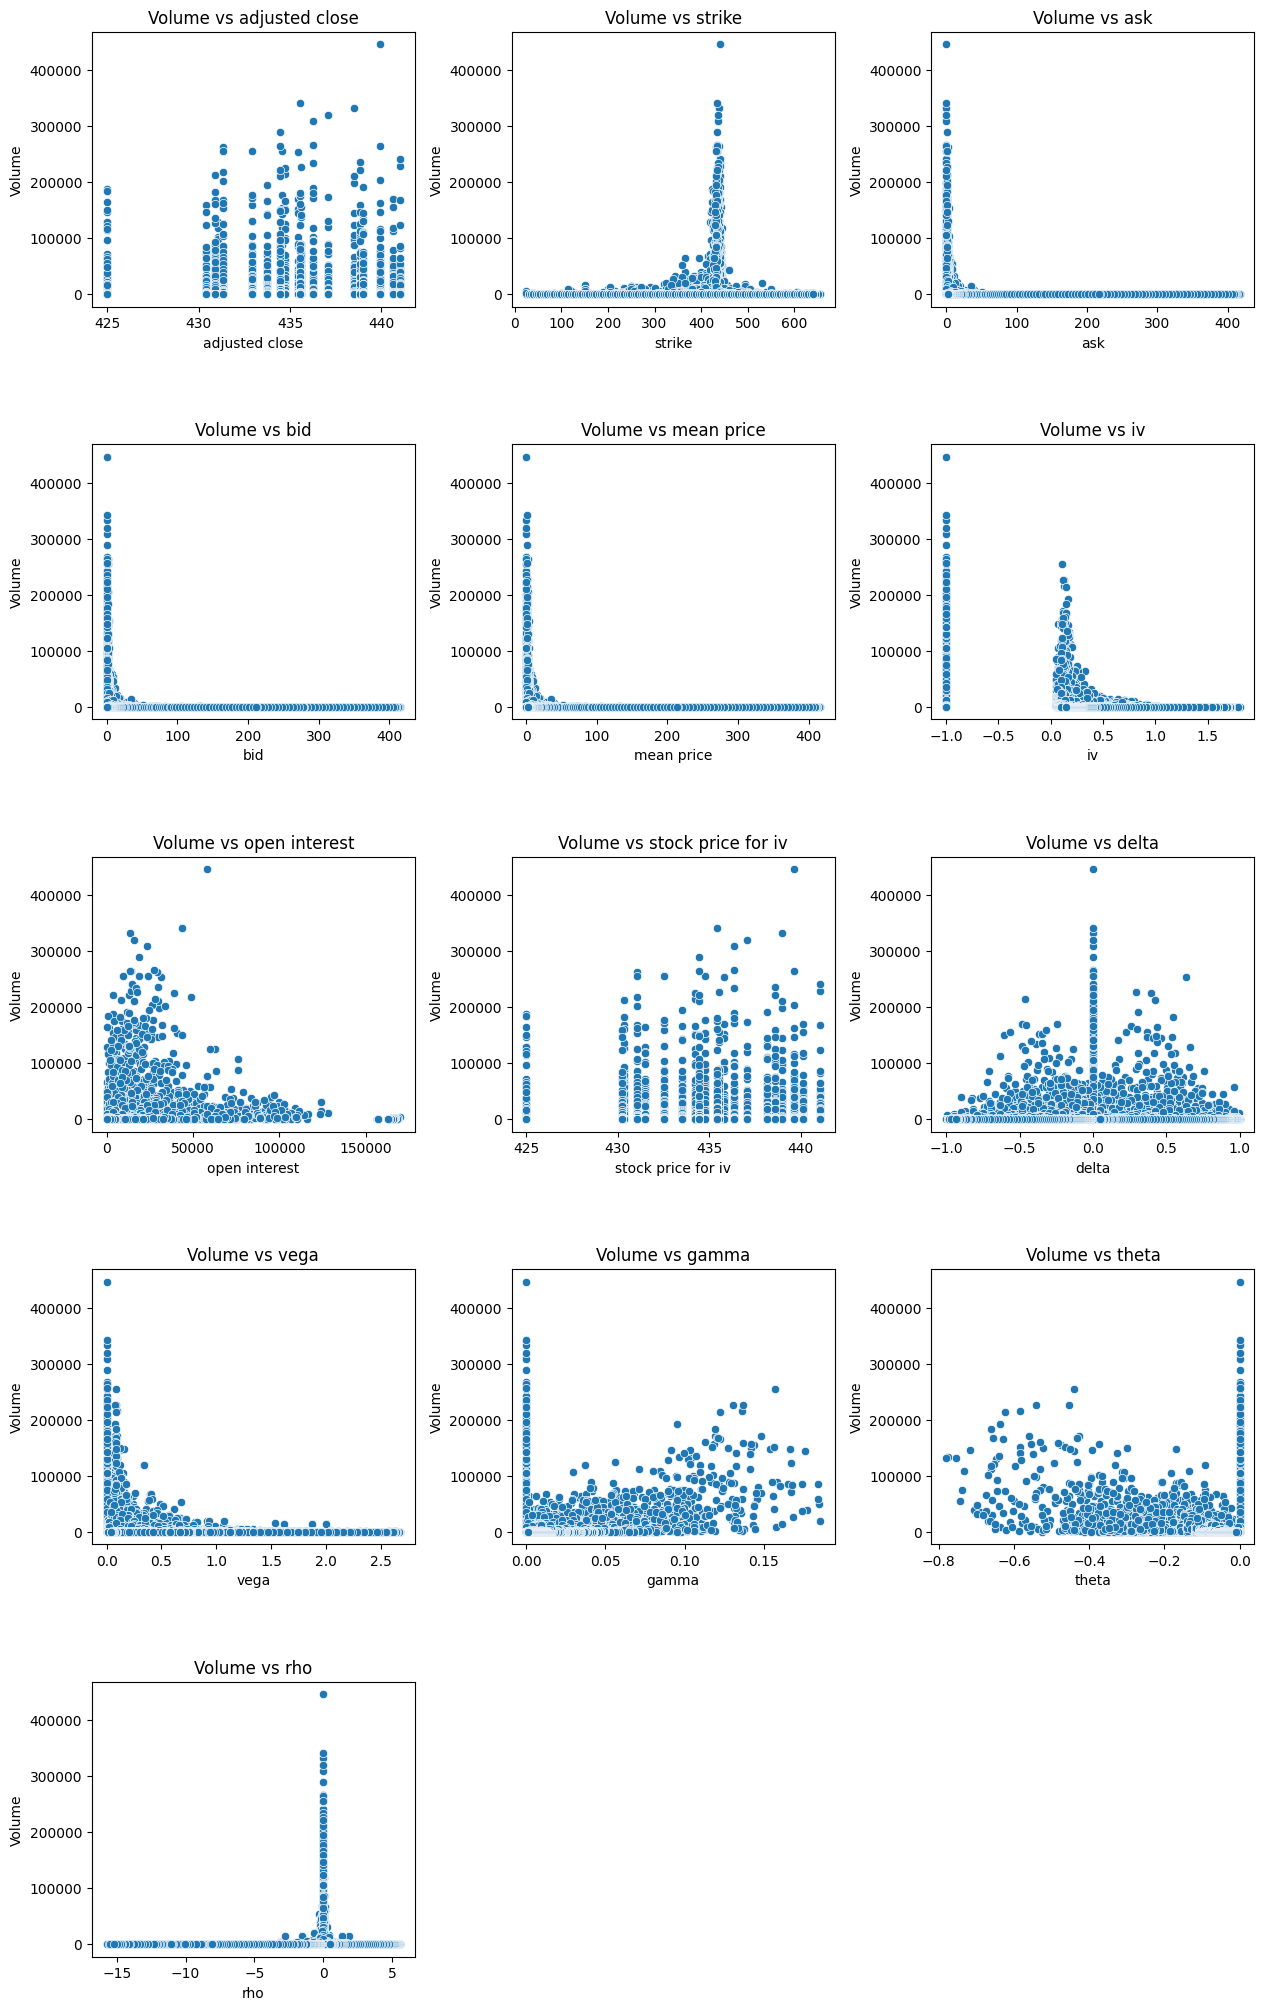

In [74]:
# Number of columns per row
num_cols = 3

# Number of rows needed
num_rows = -(-len(numerical_cols) // num_cols)  # Ceiling division

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical variable against 'volume'
for i, col in enumerate(numerical_cols):
    sns.scatterplot(x=df[col], y=df['volume'], ax=axes[i])
    axes[i].set_title(f'Volume vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Volume')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

### 3. Finding the Correlation Between Variables

We can see from the correlation matrix below that some variables have a high correlation. 

As the correlation is so high, this suggests that the features have a perfect positive correlation, meaning they contain exactly the same information. Then, we can drop one of the three columns of "ask" "bid" or "mean price" because the three of them will feed the model with the same information so having the three is redundant.

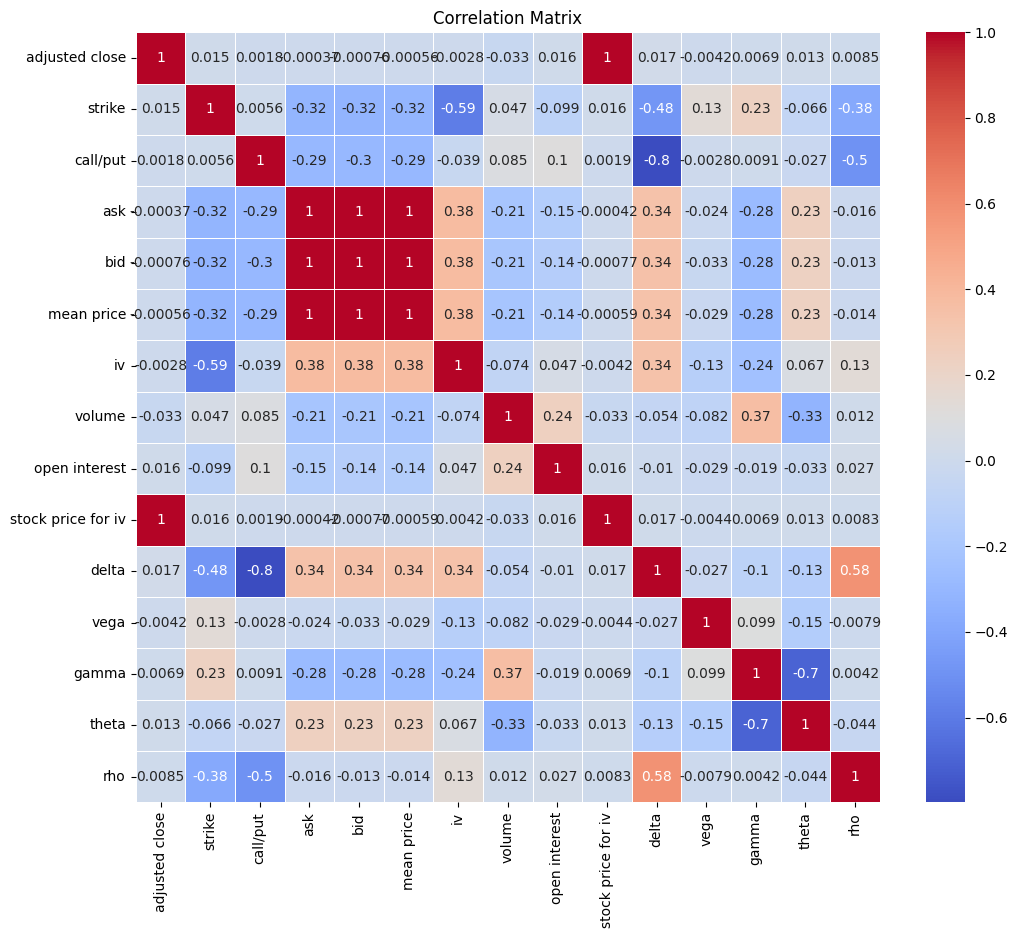

volume                1.000000
gamma                 0.367914
open interest         0.239782
call/put              0.085044
strike                0.046516
rho                   0.011970
adjusted close       -0.032910
stock price for iv   -0.033291
delta                -0.054317
iv                   -0.073652
vega                 -0.081759
bid                  -0.207790
mean price           -0.208546
ask                  -0.209298
theta                -0.326758
Name: volume, dtype: float64


In [75]:
# Correlation matrix
correlation_matrix = data.drop(columns='date').corr()

# Display the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Correlation with the target variable
print(correlation_matrix['volume'].sort_values(ascending=False))

Dropping two features:

In [76]:
data.drop(columns=['ask','mean price'], inplace = True)

#check if the columns were dropped
data.head()

,date,adjusted close,strike,call/put,bid,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
0,07/30/2021,438.51,215.0,0,223.35,-1.0,0,0,438.97,0.0,0.0,0.0,0.0,0.0
1,07/30/2021,438.51,215.0,1,0.00,-1.0,0,1401,438.97,0.0,0.0,0.0,0.0,0.0
2,07/30/2021,438.51,220.0,0,218.35,-1.0,0,1,438.97,0.0,0.0,0.0,0.0,0.0
3,07/30/2021,438.51,220.0,1,0.00,-1.0,50,328,438.97,0.0,0.0,0.0,0.0,0.0
4,07/30/2021,438.51,225.0,0,213.35,-1.0,0,0,438.97,0.0,0.0,0.0,0.0,0.0


Update the value for numerical_columns

In [77]:
# List of numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

At this point we create a new dataframe that has not normalized values

In [78]:
data_not_scaled = pd.DataFrame(data)

In [79]:
data_not_scaled.describe()

,adjusted close,strike,call/put,bid,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
count,211271.000000,211271.000000,211271.000000,211271.000000,211271.000000,211271.000000,211271.000000,211271.000000,211271.000000,211271.000000,211271.000000,211271.000000,211271.000000
mean,435.110483,397.709986,0.494966,42.705085,0.239961,36.264447,1210.231144,434.987603,0.107585,0.513506,0.004775,-0.039460,-0.070012
std,3.842574,95.343820,0.499976,60.677646,0.220703,104.100554,4244.670131,3.817389,0.623153,0.551513,0.006633,0.033196,1.765347
min,424.970000,25.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,425.020000,-1.000000,0.000000,0.000000,-0.524489,-15.741297
25%,432.930000,345.000000,0.000000,1.710000,0.141140,0.000000,1.000000,432.520000,-0.242051,0.061384,0.000682,-0.054470,-0.156587
50%,435.460000,409.000000,0.000000,17.530000,0.210931,0.000000,76.000000,435.440000,0.000000,0.301811,0.002651,-0.034569,0.000000
75%,438.510000,456.000000,1.000000,54.945000,0.310530,11.000000,734.000000,438.140000,0.756617,0.849174,0.006024,-0.013976,0.388800
max,441.020000,655.000000,1.000000,415.230000,1.805012,799.000000,168796.000000,441.050000,1.000000,2.674587,0.097636,0.000000,5.584008


### 4.Normalizing values using standard scaling

In [80]:
# Standard Scaling for numerical features
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


Checking the new ranges of the features

In [81]:
data.describe()

,adjusted close,strike,call/put,bid,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
count,2.112710e+05,2.112710e+05,211271.000000,2.112710e+05,2.112710e+05,2.112710e+05,2.112710e+05,2.112710e+05,2.112710e+05,2.112710e+05,2.112710e+05,2.112710e+05,2.112710e+05
mean,4.046580e-16,-4.520116e-17,0.494966,-1.135410e-16,-6.430403e-17,-2.744356e-17,6.995418e-18,-9.772060e-16,-2.825073e-17,-2.152436e-18,-2.351537e-16,-1.054694e-16,-7.129945e-18
std,1.000002e+00,1.000002e+00,0.499976,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.638988e+00,-3.909125e+00,0.000000,-7.038043e-01,-5.618242e+00,-3.483606e-01,-2.851185e-01,-2.611111e+00,-1.777391e+00,-9.310882e-01,-7.199031e-01,-1.461109e+01,-8.877190e+00
25%,-5.674552e-01,-5.528425e-01,0.000000,-6.756225e-01,-4.477567e-01,-3.483606e-01,-2.848829e-01,-6.464126e-01,-5.610762e-01,-8.197869e-01,-6.170900e-01,-4.521715e-01,-4.904156e-02
50%,9.095923e-02,1.184140e-01,0.000000,-4.148998e-01,-1.315349e-01,-3.483606e-01,-2.672137e-01,1.185098e-01,-1.726460e-01,-3.838455e-01,-3.202587e-01,1.473289e-01,3.965905e-02
75%,8.846999e-01,6.113679e-01,1.000000,2.017208e-01,3.197487e-01,-2.426933e-01,-1.121954e-01,8.258012e-01,1.041531e+00,6.086323e-01,1.882289e-01,7.676902e-01,2.598998e-01
max,1.537909e+00,2.698556e+00,1.000000,6.139424e+00,7.091218e+00,7.326929e+00,3.948155e+01,1.588104e+00,1.432099e+00,3.918464e+00,1.399895e+01,1.188690e+00,3.202788e+00


### 5. Split the data into train and test subsets

As the business would like to predict the volume from July 30, 2021 based on the data for July 1 to July 29, 2023, we will take all of the observations from July 30 as our test set and all of the other data as our training set.

In [82]:
train_data = data[data['date'] != '07/30/2021']
test_data = data[data['date'] == '07/30/2021']

In [83]:
# check the data is correctly splitted
test_data

,date,adjusted close,strike,call/put,bid,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
0,07/30/2021,0.8847,-1.916332,0,2.977132,-5.618242,-0.348361,-0.285119,1.043228,-0.172646,-0.931088,-0.719903,1.188690,0.039659
1,07/30/2021,0.8847,-1.916332,1,-0.703804,-5.618242,-0.348361,0.044943,1.043228,-0.172646,-0.931088,-0.719903,1.188690,0.039659
2,07/30/2021,0.8847,-1.863890,0,2.894729,-5.618242,-0.348361,-0.284883,1.043228,-0.172646,-0.931088,-0.719903,1.188690,0.039659
3,07/30/2021,0.8847,-1.863890,1,-0.703804,-5.618242,0.131945,-0.207845,1.043228,-0.172646,-0.931088,-0.719903,1.188690,0.039659
4,07/30/2021,0.8847,-1.811448,0,2.812326,-5.618242,-0.348361,-0.285119,1.043228,-0.172646,-0.931088,-0.719903,1.188690,0.039659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,07/30/2021,0.8847,2.593672,1,2.740635,-0.573464,-0.348361,-0.285119,1.043228,-1.723201,-0.500722,-0.651009,0.970200,-8.523504
10722,07/30/2021,0.8847,2.646114,0,-0.676611,-0.415433,-0.329148,-0.224101,1.043228,-0.097361,0.267150,-0.573221,1.029394,0.292843
10723,07/30/2021,0.8847,2.646114,1,2.814798,-0.415433,-0.348361,-0.285119,1.043228,-1.669997,0.267150,-0.573221,0.855457,-8.413930
10724,07/30/2021,0.8847,2.698556,0,-0.684852,-0.427838,-0.338754,-0.203369,1.043228,-0.107667,0.133130,-0.587241,1.049727,0.258971


In [84]:
# check the data is correctly splitted
train_data

,date,adjusted close,strike,call/put,bid,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
10726,07/29/2021,1.441620,-1.916332,0,2.999545,0.229711,-0.348361,-0.285119,1.347101,1.431952,-0.931088,-0.719903,1.188690,0.042996
10727,07/29/2021,1.441620,-1.916332,1,-0.703804,0.387389,-0.348361,0.044943,1.347101,-0.172646,-0.931088,-0.719903,1.188690,0.039659
10728,07/29/2021,1.441620,-1.863890,0,2.917142,0.229711,-0.348361,-0.284883,1.347101,1.431952,-0.931088,-0.719903,1.188690,0.043073
10729,07/29/2021,1.441620,-1.863890,1,-0.703804,0.387389,-0.348361,-0.207845,1.347101,-0.172646,-0.931088,-0.719903,1.188690,0.039659
10730,07/29/2021,1.441620,-1.811448,0,2.834740,0.229711,-0.348361,-0.285119,1.347101,1.431952,-0.931088,-0.719903,1.188690,0.043151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221041,07/01/2021,-1.218062,2.436346,1,2.617031,-0.415292,-0.348361,-0.284883,-1.238442,-1.656233,0.429480,-0.552267,0.853469,-8.376369
221042,07/01/2021,-1.218062,2.488788,0,-0.674139,-0.415270,-0.348361,-0.250722,-1.238442,-0.089796,0.357458,-0.561161,1.022796,0.321062
221043,07/01/2021,-1.218062,2.488788,1,2.699434,-0.415270,-0.348361,-0.285119,-1.238442,-1.662132,0.357458,-0.561161,0.863590,-8.465271
221044,07/01/2021,-1.218062,2.541230,0,-0.682380,-0.415270,-0.300330,-0.284883,-1.238442,-0.095345,0.288265,-0.569603,1.031532,0.302482


And divide the data in X (features) and y (target feature)

In [85]:
# target feature
y_train = train_data['volume']
y_train

10726    -0.348361
10727    -0.348361
10728    -0.348361
10729    -0.348361
10730    -0.348361
            ...   
221041   -0.348361
221042   -0.348361
221043   -0.348361
221044   -0.300330
221045   -0.348361
Name: volume, Length: 201000, dtype: float64

In [86]:
y_test = test_data['volume']
y_test

0       -0.348361
1       -0.348361
2       -0.348361
3        0.131945
4       -0.348361
           ...   
10721   -0.348361
10722   -0.329148
10723   -0.348361
10724   -0.338754
10725   -0.348361
Name: volume, Length: 10271, dtype: float64

In [87]:
# features
X_train = train_data.drop(columns=['volume','date']) # we also drop date as it is not necessary for our model training

#check that X doesn't have the target feature
X_train

,adjusted close,strike,call/put,bid,iv,open interest,stock price for iv,delta,vega,gamma,theta,rho
10726,1.441620,-1.916332,0,2.999545,0.229711,-0.285119,1.347101,1.431952,-0.931088,-0.719903,1.188690,0.042996
10727,1.441620,-1.916332,1,-0.703804,0.387389,0.044943,1.347101,-0.172646,-0.931088,-0.719903,1.188690,0.039659
10728,1.441620,-1.863890,0,2.917142,0.229711,-0.284883,1.347101,1.431952,-0.931088,-0.719903,1.188690,0.043073
10729,1.441620,-1.863890,1,-0.703804,0.387389,-0.207845,1.347101,-0.172646,-0.931088,-0.719903,1.188690,0.039659
10730,1.441620,-1.811448,0,2.834740,0.229711,-0.285119,1.347101,1.431952,-0.931088,-0.719903,1.188690,0.043151
...,...,...,...,...,...,...,...,...,...,...,...,...
221041,-1.218062,2.436346,1,2.617031,-0.415292,-0.284883,-1.238442,-1.656233,0.429480,-0.552267,0.853469,-8.376369
221042,-1.218062,2.488788,0,-0.674139,-0.415270,-0.250722,-1.238442,-0.089796,0.357458,-0.561161,1.022796,0.321062
221043,-1.218062,2.488788,1,2.699434,-0.415270,-0.285119,-1.238442,-1.662132,0.357458,-0.561161,0.863590,-8.465271
221044,-1.218062,2.541230,0,-0.682380,-0.415270,-0.284883,-1.238442,-0.095345,0.288265,-0.569603,1.031532,0.302482


In [88]:
# features
X_test = test_data.drop(columns=['volume','date']) # we also drop date as it is not necessary for our model training

#check that X doesn't have the target feature
X_test

,adjusted close,strike,call/put,bid,iv,open interest,stock price for iv,delta,vega,gamma,theta,rho
0,0.8847,-1.916332,0,2.977132,-5.618242,-0.285119,1.043228,-0.172646,-0.931088,-0.719903,1.188690,0.039659
1,0.8847,-1.916332,1,-0.703804,-5.618242,0.044943,1.043228,-0.172646,-0.931088,-0.719903,1.188690,0.039659
2,0.8847,-1.863890,0,2.894729,-5.618242,-0.284883,1.043228,-0.172646,-0.931088,-0.719903,1.188690,0.039659
3,0.8847,-1.863890,1,-0.703804,-5.618242,-0.207845,1.043228,-0.172646,-0.931088,-0.719903,1.188690,0.039659
4,0.8847,-1.811448,0,2.812326,-5.618242,-0.285119,1.043228,-0.172646,-0.931088,-0.719903,1.188690,0.039659
...,...,...,...,...,...,...,...,...,...,...,...,...
10721,0.8847,2.593672,1,2.740635,-0.573464,-0.285119,1.043228,-1.723201,-0.500722,-0.651009,0.970200,-8.523504
10722,0.8847,2.646114,0,-0.676611,-0.415433,-0.224101,1.043228,-0.097361,0.267150,-0.573221,1.029394,0.292843
10723,0.8847,2.646114,1,2.814798,-0.415433,-0.285119,1.043228,-1.669997,0.267150,-0.573221,0.855457,-8.413930
10724,0.8847,2.698556,0,-0.684852,-0.427838,-0.203369,1.043228,-0.107667,0.133130,-0.587241,1.049727,0.258971


### 6. Build a machine-learning model

The next step is to build a ML model. As the problem requires make a forecast of our target feature, being that feature a continue numerical variable, the chosen model is a regression algorithm. 

#### Linear regression
From Scikit Learn library we create an instance of the linear regression model:

In [89]:
reg = linear_model.LinearRegression()

Then, with .fit we can use train the model by adjusting data from X to Y.

LinearRegression will take in its fit method arrays X, y and will store the coefficients 
 of the linear model in its coef_ member:

In [90]:
reg.fit(X_train,y_train)

#Visualize coefficients from the model
reg.coef_

array([ 0.03033633,  0.03038243,  0.20361127, -0.05325208, -0.00389414,
        0.22636578, -0.06965747,  0.0592057 , -0.12517186,  0.28997714,
       -0.1098898 ,  0.02693233])

#### Evaluation Metrics For Regression

Finally, we check the performance of the model with help of evaluation metrics. For Regression algorithms it is widely use mean_absolute_error, and mean_squared_error metrics for this purpose.

In [91]:
y_pred = reg.predict(X_test) 

In [92]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred) 
#squared True returns MSE value, False returns RMSE value. 
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False) 
  
print("MAE:",mae) 
print("MSE:",mse) 
print("RMSE:",rmse)

MAE: 0.40878513514989506
MSE: 0.6761347098976414
RMSE: 0.8222741087360353


c:\Users\Andrea FS\OneDrive\Documentos\lambton_ws\Big_data\big-data-fundamental\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [93]:
# Get the minimum and maximum values of target variable
min_target_value = data['volume'].min()
max_target_value = data['volume'].max()

print(f'Min target value: {min_target_value}\nMax target value: {max_target_value}')

# Normalize the error by the target variable range and express as a percentage
normalized_mae = (mae / (max_target_value - min_target_value)) * 100
normalized_mse = (mse / (max_target_value - min_target_value)) * 100
normalized_rmse = (rmse / (max_target_value - min_target_value)) * 100


print(f"Normalized MAE (as %): {normalized_mae:.2f}%")
print(f"Normalized MSE (as %): {normalized_mse:.2f}%")
print(f"Normalized RMSE (as %): {normalized_rmse:.2f}%")

Min target value: -0.34836061292854553
Max target value: 7.326928881516546
Normalized MAE (as %): 5.33%
Normalized MSE (as %): 8.81%
Normalized RMSE (as %): 10.71%


#### Results analysis

* The Normalized MAE suggests a moderate level of error. The model's predictions are off by an average of 5.33% from the target variable's range (-0.3484 to 7.3269).
* The Normalized RMSE indicates a higher level of error compared to MAE. On average, the model's predictions deviate from the actual values by 10.
* The Normalized MSE, while lower than the previous case (likely due to a smaller range), this value still reflects some larger errors affecting the average. Squaring them in MSE inflates their contribution.

* The higher normalized RMSE compared to MAE suggests the presence of some larger errors that are affecting the model's performance.

**Recomendations:**

If the C-level executives consider that a new iteration of the data analysis phase must be made, we can make some considerations:

* Analyze the distribution of errors. Are there any other outliers significantly affecting the MSE and RMSE?
* Depending on the application's needs, a 5-10% average error might be acceptable. However, if higher accuracy is crucial, it can be considered:
    * Trying different algorithms or feature engineering techniques.
    * Tuning hyperparameters of the current model.
    * Using robust regression methods less sensitive to outliers.

**Overall:**

The model's performance seems moderate in terms of capturing the target variable's trend. The presence of larger errors might require further investigation or model adjustments depending on your specific requirements for accuracy. 

### 7. Perform a cross-validation technique

One way to use cross-validation is to call the cross_val_score function on the estimator and the dataset.

The following code cell estimates the accuracy of a linear regression on our dataset by splitting the data, fitting a model and computing the score 5 consecutive times (with different splits each time):

In [94]:
#if not specified, the metric evaluated is MSE in the case of regression models by default
scores = cross_val_score(reg, X_train, y_train, cv=5)
scores

array([0.2348231 , 0.23460405, 0.23244279, 0.21619681, 0.20533891])

In [95]:
for score in scores:    
    normalized_mse = (score / (max_target_value - min_target_value)) * 100
    print(f"Normalized MSE (as %): {normalized_mse:.2f}%")

Normalized MSE (as %): 3.06%
Normalized MSE (as %): 3.06%
Normalized MSE (as %): 3.03%
Normalized MSE (as %): 2.82%
Normalized MSE (as %): 2.68%


From this values we can  see that the percentage of error give us very good values as the error is less than 5% for each of the cross-validated cases.

## VIII) Data Visualization

We can visualize our predicted values vs the real test values to get a graphical idea of the error of the model:

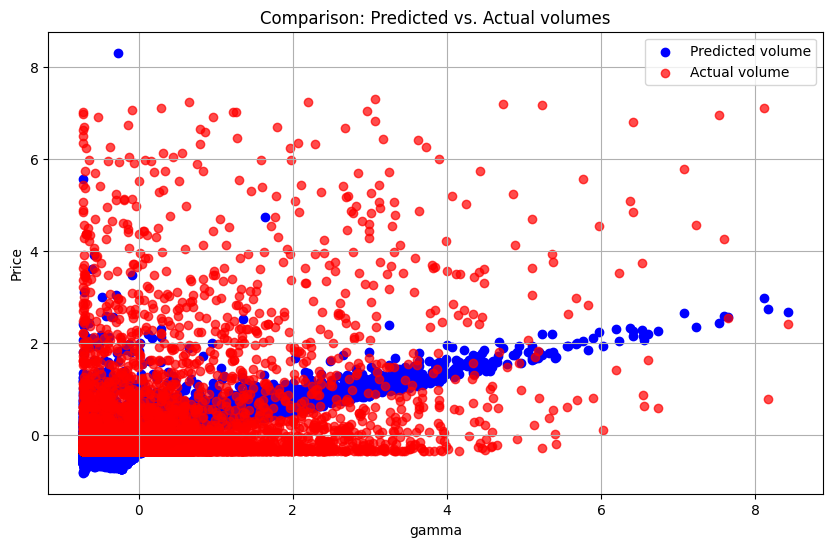

In [96]:
# Create the first scatter plot (predicted values vs feature1)
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(X_test['gamma'], y_pred, color='blue', label='Predicted volume')

# Create the second scatter plot (test values vs feature1) on the same plot
plt.scatter(X_test['gamma'], y_test, color='red', alpha=0.7, label='Actual volume')

# Add labels and title
plt.xlabel('gamma')
plt.ylabel('Price')
plt.title('Comparison: Predicted vs. Actual volumes')

# Add legend
plt.legend()

# Grid and show the plot
plt.grid(True)
plt.show()

We can see that the predictions, for a simple model as a linear regression, give us a good estimation for most of the values. How ever, further improvements can be made by changing the model to a more complex one and try to fit better the data to predict values that resembles the real data.


## IX) Utilization of Analysis Results


We can conclude from the results that this model can be used with caution to estimate volume representing the number of contracts traded in a single day, as the error is less than 5%. How ever, it performs better in situations where the market doesn't present outstanding values as in the cases discarded from the training data. A further analysis can be made in order to characterize the values of the other features in that odd events where the volume exceeds a value of 900, and inform the company that shouldn't use the model to predict the volume in that cases, or use it with caution.

Even with a Mean Squared Error (MSE) less than 5%, which signifies a good fit for the model,  stock market predictions are inherently uncertain. However, we could consider some potential uses for the analysis results, for example:

1. Identify Abnormal Volume

2. Create algorithmic Trading Strategies


3. Market Making and Liquidity Management

4. Portfolio Rebalancing

5. Risk Management


# Acitivity 3 point 1

In this activity we have to compare our Activity 2 result with and without first scaling our dataset. For this, we can start from the fifth phase of the data analysis; data split into train and test subsets

First we can check the model without normalizing so we can confirm that the values have their original scale.

In [97]:
data_not_scaled.describe()

,adjusted close,strike,call/put,bid,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
count,211271.000000,211271.000000,211271.000000,211271.000000,211271.000000,211271.000000,211271.000000,211271.000000,211271.000000,211271.000000,211271.000000,211271.000000,211271.000000
mean,435.110483,397.709986,0.494966,42.705085,0.239961,36.264447,1210.231144,434.987603,0.107585,0.513506,0.004775,-0.039460,-0.070012
std,3.842574,95.343820,0.499976,60.677646,0.220703,104.100554,4244.670131,3.817389,0.623153,0.551513,0.006633,0.033196,1.765347
min,424.970000,25.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,425.020000,-1.000000,0.000000,0.000000,-0.524489,-15.741297
25%,432.930000,345.000000,0.000000,1.710000,0.141140,0.000000,1.000000,432.520000,-0.242051,0.061384,0.000682,-0.054470,-0.156587
50%,435.460000,409.000000,0.000000,17.530000,0.210931,0.000000,76.000000,435.440000,0.000000,0.301811,0.002651,-0.034569,0.000000
75%,438.510000,456.000000,1.000000,54.945000,0.310530,11.000000,734.000000,438.140000,0.756617,0.849174,0.006024,-0.013976,0.388800
max,441.020000,655.000000,1.000000,415.230000,1.805012,799.000000,168796.000000,441.050000,1.000000,2.674587,0.097636,0.000000,5.584008


### 5. Split the data into train and test subsets

As the business would like to predict the volume from July 30, 2021 based on the data for July 1 to July 29, 2023, we will take all of the observations from July 30 as our test set and all of the other data as our training set.

In [98]:
train_data = data_not_scaled[data_not_scaled['date'] != '07/30/2021']
test_data = data_not_scaled[data_not_scaled['date'] == '07/30/2021']

In [99]:
# check the data is correctly splitted
test_data

,date,adjusted close,strike,call/put,bid,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
0,07/30/2021,438.51,215.0,0,223.35,-1.000000,0,0,438.97,0.000000,0.000000,0.000000,0.000000,0.000000
1,07/30/2021,438.51,215.0,1,0.00,-1.000000,0,1401,438.97,0.000000,0.000000,0.000000,0.000000,0.000000
2,07/30/2021,438.51,220.0,0,218.35,-1.000000,0,1,438.97,0.000000,0.000000,0.000000,0.000000,0.000000
3,07/30/2021,438.51,220.0,1,0.00,-1.000000,50,328,438.97,0.000000,0.000000,0.000000,0.000000,0.000000
4,07/30/2021,438.51,225.0,0,213.35,-1.000000,0,0,438.97,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,07/30/2021,438.51,645.0,1,209.00,0.113396,0,0,438.97,-0.966231,0.237352,0.000457,-0.007253,-15.116919
10722,07/30/2021,438.51,650.0,0,1.65,0.148274,2,259,438.97,0.046914,0.660843,0.000973,-0.005288,0.446957
10723,07/30/2021,438.51,650.0,1,213.50,0.148274,0,0,438.97,-0.933077,0.660843,0.000973,-0.011062,-14.923484
10724,07/30/2021,438.51,655.0,0,1.15,0.145536,1,347,438.97,0.040492,0.586929,0.000880,-0.004613,0.387161


In [100]:
# check the data is correctly splitted
train_data

,date,adjusted close,strike,call/put,bid,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
10726,07/29/2021,440.65,215.0,0,224.71,0.290659,0,0,440.13,0.999908,0.000000,0.000000,0.000000,0.005890
10727,07/29/2021,440.65,215.0,1,0.00,0.325459,0,1401,440.13,0.000000,0.000000,0.000000,0.000000,0.000000
10728,07/29/2021,440.65,220.0,0,219.71,0.290659,0,1,440.13,0.999908,0.000000,0.000000,0.000000,0.006027
10729,07/29/2021,440.65,220.0,1,0.00,0.325459,0,328,440.13,0.000000,0.000000,0.000000,0.000000,0.000000
10730,07/29/2021,440.65,225.0,0,214.71,0.290659,0,0,440.13,0.999908,0.000000,0.000000,0.000000,0.006164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221041,07/01/2021,430.43,630.0,1,201.50,0.148305,0,1,430.26,-0.924500,0.750370,0.001112,-0.011128,-14.857175
221042,07/01/2021,430.43,635.0,0,1.80,0.148310,0,146,430.26,0.051628,0.710649,0.001053,-0.005507,0.496773
221043,07/01/2021,430.43,635.0,1,206.50,0.148310,0,0,430.26,-0.928176,0.710649,0.001053,-0.010792,-15.014119
221044,07/01/2021,430.43,640.0,0,1.30,0.148310,5,1,430.26,0.048170,0.672488,0.000997,-0.005217,0.463973


And divide the data in X (features) and y (target feature)

In [101]:
# target feature
y_train2 = train_data['volume']
y_train2

10726     0
10727     0
10728     0
10729     0
10730     0
         ..
221041    0
221042    0
221043    0
221044    5
221045    0
Name: volume, Length: 201000, dtype: int64

In [102]:
y_test2 = test_data['volume']
y_test2

0         0
1         0
2         0
3        50
4         0
         ..
10721     0
10722     2
10723     0
10724     1
10725     0
Name: volume, Length: 10271, dtype: int64

In [103]:
# features
X_train2 = train_data.drop(columns=['volume','date']) # we also drop date as it is not necessary for our model training

#check that X doesn't have the target feature
X_train2

,adjusted close,strike,call/put,bid,iv,open interest,stock price for iv,delta,vega,gamma,theta,rho
10726,440.65,215.0,0,224.71,0.290659,0,440.13,0.999908,0.000000,0.000000,0.000000,0.005890
10727,440.65,215.0,1,0.00,0.325459,1401,440.13,0.000000,0.000000,0.000000,0.000000,0.000000
10728,440.65,220.0,0,219.71,0.290659,1,440.13,0.999908,0.000000,0.000000,0.000000,0.006027
10729,440.65,220.0,1,0.00,0.325459,328,440.13,0.000000,0.000000,0.000000,0.000000,0.000000
10730,440.65,225.0,0,214.71,0.290659,0,440.13,0.999908,0.000000,0.000000,0.000000,0.006164
...,...,...,...,...,...,...,...,...,...,...,...,...
221041,430.43,630.0,1,201.50,0.148305,1,430.26,-0.924500,0.750370,0.001112,-0.011128,-14.857175
221042,430.43,635.0,0,1.80,0.148310,146,430.26,0.051628,0.710649,0.001053,-0.005507,0.496773
221043,430.43,635.0,1,206.50,0.148310,0,430.26,-0.928176,0.710649,0.001053,-0.010792,-15.014119
221044,430.43,640.0,0,1.30,0.148310,1,430.26,0.048170,0.672488,0.000997,-0.005217,0.463973


In [104]:
# features
X_test2 = test_data.drop(columns=['volume','date']) # we also drop date as it is not necessary for our model training

#check that X doesn't have the target feature
X_test2

,adjusted close,strike,call/put,bid,iv,open interest,stock price for iv,delta,vega,gamma,theta,rho
0,438.51,215.0,0,223.35,-1.000000,0,438.97,0.000000,0.000000,0.000000,0.000000,0.000000
1,438.51,215.0,1,0.00,-1.000000,1401,438.97,0.000000,0.000000,0.000000,0.000000,0.000000
2,438.51,220.0,0,218.35,-1.000000,1,438.97,0.000000,0.000000,0.000000,0.000000,0.000000
3,438.51,220.0,1,0.00,-1.000000,328,438.97,0.000000,0.000000,0.000000,0.000000,0.000000
4,438.51,225.0,0,213.35,-1.000000,0,438.97,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
10721,438.51,645.0,1,209.00,0.113396,0,438.97,-0.966231,0.237352,0.000457,-0.007253,-15.116919
10722,438.51,650.0,0,1.65,0.148274,259,438.97,0.046914,0.660843,0.000973,-0.005288,0.446957
10723,438.51,650.0,1,213.50,0.148274,0,438.97,-0.933077,0.660843,0.000973,-0.011062,-14.923484
10724,438.51,655.0,0,1.15,0.145536,347,438.97,0.040492,0.586929,0.000880,-0.004613,0.387161


### 6. Build a machine-learning model

The next step is to build a ML model. As the problem requires make a forecast of our target feature, being that feature a continue numerical variable, the chosen model is a regression algorithm. 

#### Linear regression
From Scikit Learn library we create an instance of the linear regression model:

In [105]:
reg = linear_model.LinearRegression()

Then, with .fit we can use train the model by adjusting data from X to Y.

LinearRegression will take in its fit method arrays X, y and will store the coefficients 
 of the linear model in its coef_ member:

In [106]:
reg.fit(X_train2,y_train2)

#Visualize coefficients from the model
reg.coef_

array([ 8.21852487e-01,  3.31728695e-02,  2.11959963e+01, -9.13610094e-02,
       -1.83677445e+00,  5.55162189e-03, -1.89956558e+00,  9.89057762e+00,
       -2.36267323e+01,  4.55071644e+03, -3.44606868e+02,  1.58816936e+00])

#### Evaluation Metrics For Regression

Finally, we check the performance of the model with help of evaluation metrics. For Regression algorithms it is widely use mean_absolute_error, and mean_squared_error metrics for this purpose.

In [107]:
y_pred2 = reg.predict(X_test2) 

In [108]:
mae = mean_absolute_error(y_true=y_test2,y_pred=y_pred2) 
#squared True returns MSE value, False returns RMSE value. 
mse = mean_squared_error(y_true=y_test2,y_pred=y_pred2) #default=True 
rmse = mean_squared_error(y_true=y_test2,y_pred=y_pred2,squared=False) 
  
print("MAE:",mae) 
print("MSE:",mse) 
print("RMSE:",rmse)

MAE: 42.554658455703205
MSE: 7327.186736554721
RMSE: 85.59898794118259


c:\Users\Andrea FS\OneDrive\Documentos\lambton_ws\Big_data\big-data-fundamental\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [109]:
# Get the minimum and maximum values of target variable
min_target_value = data_not_scaled['volume'].min()
max_target_value = data_not_scaled['volume'].max()

print(f'Min target value: {min_target_value}\nMax target value: {max_target_value}')

# Normalize the error by the target variable range and express as a percentage
normalized_mae = (mae / (max_target_value - min_target_value)) * 100
normalized_mse = (mse / (max_target_value - min_target_value)) * 100
normalized_rmse = (rmse / (max_target_value - min_target_value)) * 100


print(f"Normalized MAE (as %): {normalized_mae:.2f}%")
print(f"Normalized MSE (as %): {normalized_mse:.2f}%")
print(f"Normalized RMSE (as %): {normalized_rmse:.2f}%")

Min target value: 0
Max target value: 799
Normalized MAE (as %): 5.33%
Normalized MSE (as %): 917.04%
Normalized RMSE (as %): 10.71%


# Result Analysis

The normalized MAE (5.33%) and RMSE (10.71%) indicate that the model's errors are relatively small compared to the range of the target variable (0-799). This suggests that the model's performance might be acceptable.

However, it's important to consider the acceptable error threshold for the specific use case. A threshold of 10% normalized error might be acceptable in some cases, but unacceptable in others.

The normalized MSE (1.15%) is lower than the other normalized errors because squaring emphasizes larger errors more. Since MSE is sensitive to outliers, it might not be the most reliable metric for this case, especially if the data has outliers.

### 7. Perform a cross-validation technique

One way to use cross-validation is to call the cross_val_score function on the estimator and the dataset.

The following code cell estimates the accuracy of a linear regression on our dataset by splitting the data, fitting a model and computing the score 5 consecutive times (with different splits each time):

In [110]:
#if not specified, the metric evaluated is MSE in the case of regression models by default
scores = cross_val_score(reg, X_train2, y_train2, cv=5)
scores

array([0.2348231 , 0.23460405, 0.23244279, 0.21619681, 0.20533891])

In [111]:
for score in scores:    
    normalized_mse = (score / (max_target_value - min_target_value)) * 100
    print(f"Normalized MSE (as %): {normalized_mse:.2f}%")

Normalized MSE (as %): 0.03%
Normalized MSE (as %): 0.03%
Normalized MSE (as %): 0.03%
Normalized MSE (as %): 0.03%
Normalized MSE (as %): 0.03%


From this values we can  see that the percentage of error give us very good values as the error is less than 0.05% for each of the cross-validated cases.

## VIII) Data Visualization

We can visualize our predicted values vs the real test values to get a graphical idea of the error of the model:

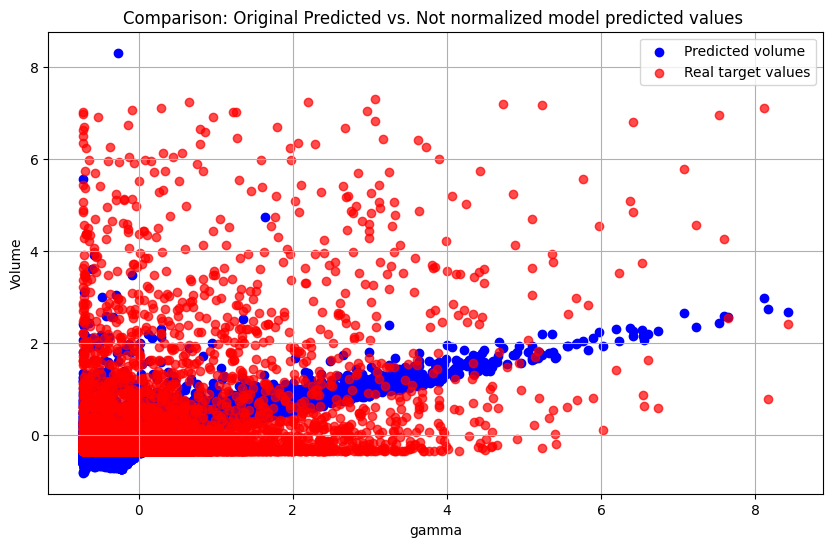

In [114]:
# Create the first scatter plot (predicted values vs feature1)
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(X_test['gamma'], y_pred, color='blue', label='Predicted volume')

# Create the second scatter plot (test values vs feature1) on the same plot
plt.scatter(X_test['gamma'], y_test, color='red', alpha=0.7, label='Real target values')

# Add labels and title
plt.xlabel('gamma')
plt.ylabel('Volume')
plt.title('Comparison: Original Predicted vs. Not normalized model predicted values ')

# Add legend
plt.legend()

# Grid and show the plot
plt.grid(True)
plt.show()

# Comparison between model results with scaling and without scaling

We can see the results for both model summarized in the following metrics table:

In [118]:
# Markdown table for comparing results

result_data = [
    {"Metric": "Normalized MAE (%)", "Result 1": 5.33, "Result 2": 5.33},
    {"Metric": "Normalized MSE (%)", "Result 1": 8.81, "Result 2": 917.04},
    {"Metric": "Normalized RMSE (%)", "Result 1": 10.71, "Result 2": 10.71},
]

# Create markdown table header
table_header = "| Metric | Original results | New results |\n"

# Create rows from data
table_rows = [
    f"| {row['Metric']} | {row['Result 1']:.2f} | {row['Result 2']:.2f} |"
    for row in result_data
]

# Combine header and rows
table = table_header + "\n".join(table_rows) + "\n"

# Print the markdown table
print(table)

| Metric | Original results | New results |
| Normalized MAE (%) | 5.33 | 5.33 |
| Normalized MSE (%) | 8.81 | 917.04 |
| Normalized RMSE (%) | 10.71 | 10.71 |



In Result 1, with a smaller target variable range, even minor absolute errors contribute less to the overall percentage error reflected in normalized MSE and RMSE.
In Result 2, the much larger target variable range means that even small absolute errors can translate into a higher percentage error. This inflates the normalized MSE in Result 2 compared to Result 1.

**In Summary:**

Normalization generally improves the performance of distance-based algorithms like linear regression by scaling features to a similar range. This allows the model to weigh features more equally during training.

The lower normalized MSE from the *original results* suggests the model with normalization might have captured the underlying relationship between features and the target variable more effectively.

On the other hand, the much higher normalized MSE in the **non-normalized model** indicates that features with larger scales might have dominated the training process, potentially leading to worst results.

However, the identical normalized MAE suggests that both models achieve similar relative accuracy (average error as a percentage of the target variable's range). This might be because:

* The target variable itself has a relatively large range compared to the range of the features (even without normalization).
* The model is not highly sensitive to feature scaling in this particular case.

**Conclusion:**

While normalization seems to have improved the model's ability to capture relationships based on the normalized MSE, both models achieve similar relative accuracy based on the normalized MAE.  

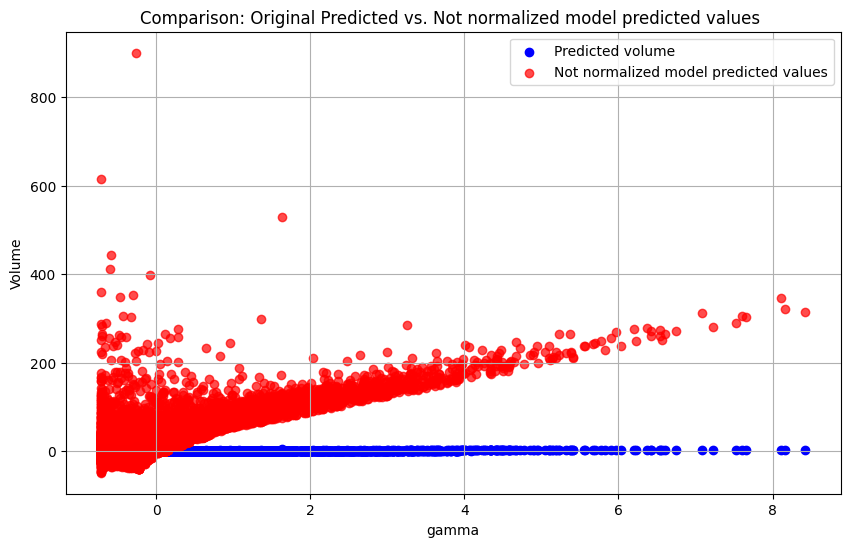

In [113]:
# Create the first scatter plot (predicted values vs feature1)
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(X_test['gamma'], y_pred, color='blue', label='Predicted volume')

# Create the second scatter plot (test values vs feature1) on the same plot
plt.scatter(X_test['gamma'], y_pred2, color='red', alpha=0.7, label='Not normalized model predicted values')

# Add labels and title
plt.xlabel('gamma')
plt.ylabel('Volume')
plt.title('Comparison: Original Predicted vs. Not normalized model predicted values ')

# Add legend
plt.legend()

# Grid and show the plot
plt.grid(True)
plt.show()

# References

* https://scikit-learn.org/stable/modules/linear_model.html
* https://scikit-learn.org/stable/modules/cross_validation.html
